In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [137]:
raw_df = pd.read_csv('./new12.csv')
raw_df = raw_df['fp1']
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(10)

0   -1088.650757
1   -1088.488159
2   -1088.336426
3   -1088.336914
4   -1088.652344
5   -1089.420410
6   -1090.710815
7   -1092.499390
8   -1094.671753
9   -1097.055664
Name: fp1, dtype: float64

In [142]:
ekg_data_segment = raw_df
segment_len = 30
slide_len = 5

segments = []
for start_pos in range(0, len(ekg_data_segment), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data_segment[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))



# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(segments) 

# Normalizing the Data 
scaler= MinMaxScaler()
scaler.fit(scaled_df) 
normalized_df=scaler.transform(scaled_df)
#normalized_df = normalize(scaled_df) 
  



# # Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# # Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

Produced 11997 waveform segments


,P1,P2
0,2.289321,-0.030754
1,2.303050,-0.026347


In [154]:
n_components = 3
gmm = GaussianMixture(n_components = n_components) 
gmm.fit(X_principal)


GaussianMixture(n_components=3)

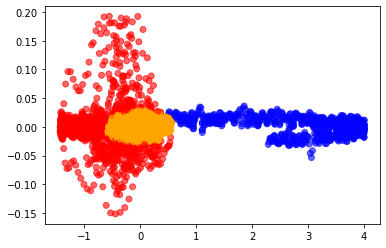

In [155]:
from matplotlib import colors
cmap = colors.LinearSegmentedColormap.from_list("", ["red","green","blue","yellow","orange"])

# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = n_components).fit_predict(X_principal),cmap=cmap , alpha = 0.6) 
plt.show()

In [156]:
print(gmm.lower_bound_) 
print(gmm.n_iter_)
  

2.589027319920545
7
